In [75]:
import pandas as pd

In [76]:
df = pd.read_json("data/SH_ty2.json")

In [77]:
sh_fang_data = df.T

In [78]:
import re
sh_fang_data.index = sh_fang_data.index.map(lambda x: int(re.search("(\d)*", x)[0]))

#### 经方古今剂量的换算：

```
1斤=250克   
1两=15.625克    
液体1升=200毫升   
1合=20毫升    
圭=0.5克  
侖=10毫升  
撮=2克  
方寸匕=2.74克
半方寸匕=1刀圭=1钱匕=1.5~1.8克   
1铢=0.7克
```

#### 特殊称量方法的中药剂量换算：
```
蜀椒1升=50克     葶苈子1升=60克  吴茱萸1升=31g
半夏1升=100克    吂虫1升=16克    火麻仁1升=49g
麦冬1升=61g      五味子1升=60g   枚大枣12个=36g
杏仁1O枚=4g      厚朴1尺=约15g    桃仁100枚=30g
```

```
附子大者一枚=20-30克 ,中者1枚15克   乌头1枚，小者3克，大者5-6克
杏仁大者10枚4克   栀子10枚平均15克  瓜蒌1枚约46克   枳实1枚约14.4克 
石膏鸡蛋大1枚约40克 厚朴1尺约30克   竹叶一握约12克
```

In [82]:
weight_map = {
    "斤": 250,
    "两": 15.625,
    "升": 200,
    "合": 20,    
    "圭": 0.5,  
    "侖": 10,  
    "撮": 2, 
    "方寸匕": 2.74,
    "半方寸匕": 1.7,
    "刀圭": 1.7, 
    "钱匕": 1.7,   
    "铢": 0.7,
    "株": 0.7,
    "把": 12,
    "握": 12,
    "枚": 25,
    "个": 1,
    "克": 1,
    "茎": 1,
    "些": 1,
    "分": 3,
    "尺": 15,
    "未写": 1,
    "暂无": 1,
}

shu_al = dict(zip("一二三四五六七八九十", range(1, 11)))

In [83]:
def convert_jiliang(jl):
    for gdw, ke in weight_map.items():
        jl = jl.replace(gdw, " * {} * ".format(ke))
    for zws, als in shu_al.items():
        jl = jl.replace(zws, "{}".format(als))
    jl = jl.strip().strip("*")
    jl = eval(jl)
    return jl

convert_jiliang("5斤四两")

78125.0

In [85]:
sh_fang_jl.loc["麻黄升麻汤"]

{'茯苓': 4.199999999999999,
 '炙甘草': 4.199999999999999,
 '干姜': 4.199999999999999,
 '桂枝': 4.199999999999999,
 '麻黄': 39.0625,
 '升麻': 46.875,
 '知母': 12.6,
 '黄芩': 12.6,
 '石膏': 4.199999999999999,
 '白术': 4.199999999999999,
 '萎蕤': 12.6,
 '芍药': 4.199999999999999,
 '天门冬': 4.199999999999999,
 '当归': 46.875}

In [88]:
fang_wx_jl.loc["麻黄升麻汤"]

{'土': 55.275,
 '木': 8.399999999999999,
 '水': 55.8625,
 '火': 12.6,
 '金': 8.399999999999999,
 '无': 63.675}

In [145]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')#这个图的设定字体很清晰
plt.rcParams['figure.figsize'] = [12,10]

In [146]:
def show_yaofang_fangxiang(fname):
    fang = fang_wx_jl.loc[fname]
    if isinstance(fang, pd.Series):
        fang = fang.iloc[0]
    fang.pop("无", "")
    fang

    #标签
    labels = list("水木土金火")
    #数据个数
    dataLenth = 5
    #数据
    data = [fang.get(lab, 0)for lab in labels]

    angles = np.linspace(0, 2 * np.pi, dataLenth, endpoint=False)
    data = np.concatenate((data, [data[0]]))  # 闭合
    angles = np.concatenate((angles, [angles[0]])) # 闭合

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, polar=True)# polar参数！！
    ax.plot(angles, data, 'r', linewidth=2, alpha=0.5)# 画线
    ax.fill(angles, data, facecolor='r', alpha=0.5)# 填充
    ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="STSong")
    ax.set_title(fname+"之药性五行参考图", va='bottom', fontproperties="STSong")
    ax.set_rlim(0, max(data))
    ax.grid(True)
    plt.show()

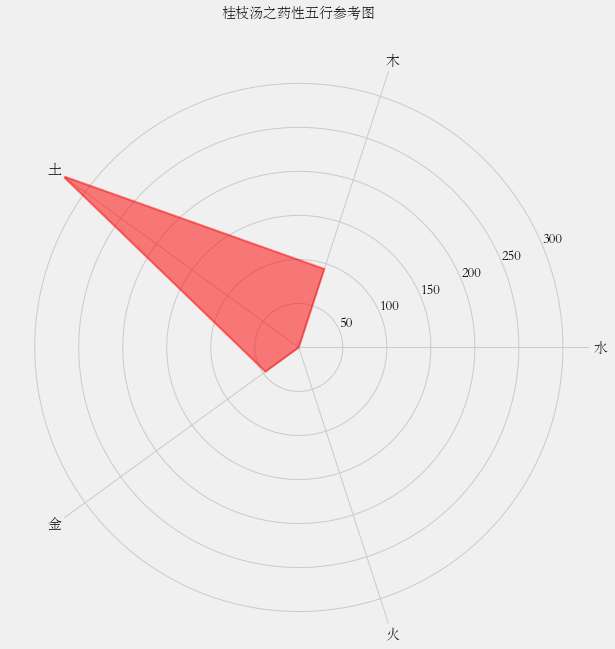

In [147]:
show_yaofang_fangxiang("桂枝汤")

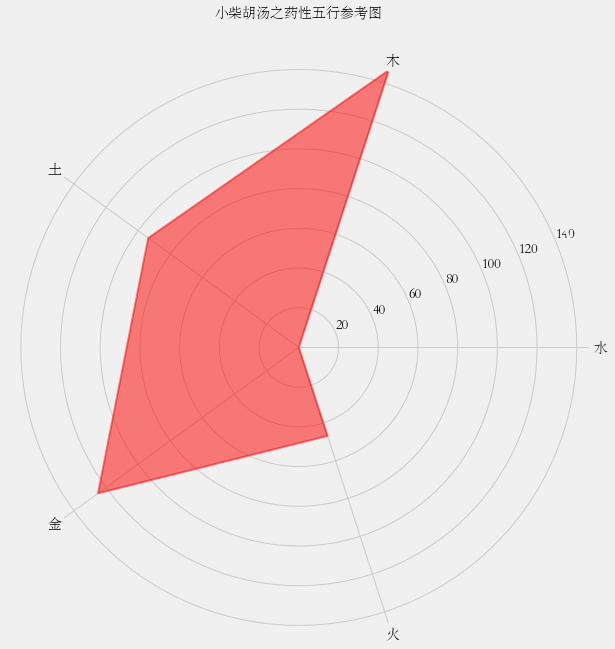

In [148]:
show_yaofang_fangxiang("小柴胡汤")

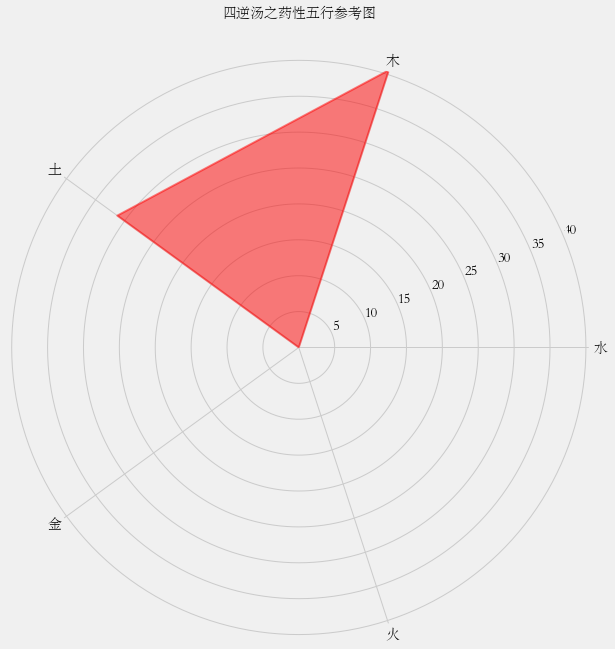

In [149]:
show_yaofang_fangxiang("四逆汤")